<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Image Classification using Machine Learing Based Algorithms
</div>



<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Import Libraries
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay



import warnings
warnings.filterwarnings("ignore")

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    On Banknotes
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [4]:
df = pd.read_csv('content/banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [14]:
X = df.drop(columns=['Class'])
y = df['Class']

In [15]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

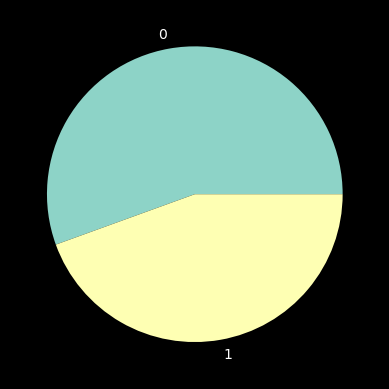

In [17]:
plt.pie(y.value_counts(), labels=y.value_counts().index)
plt.show()

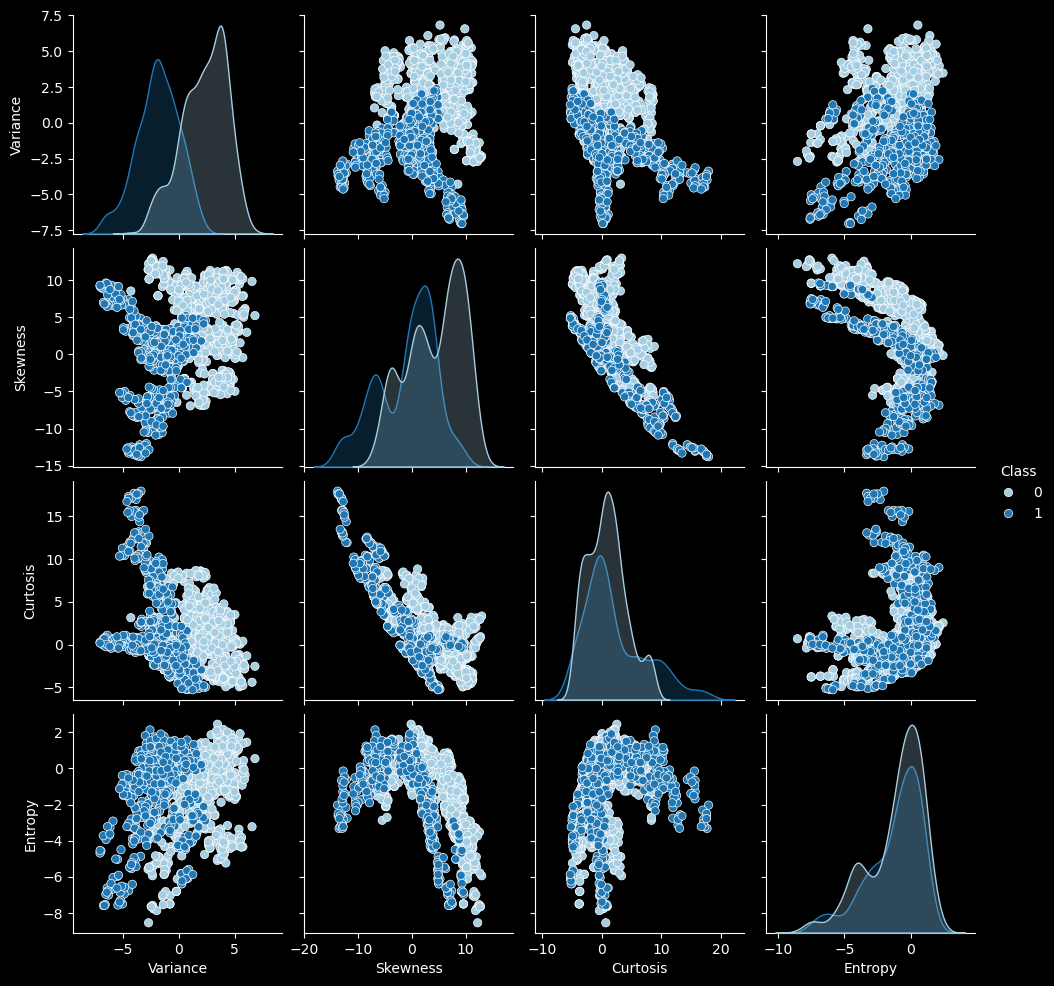

In [23]:
sns.pairplot(df, hue='Class', palette=sns.color_palette("Paired"))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [29]:
model = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9927272727272727


In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
 

[[149   0]
 [  2 124]]


In [ ]:
new = pd.DataFrame({
    'Variance': [],
    "Skewness": [],
    'Curtosis': [],
    'Entropy': [],
})

In [39]:
new = pd.DataFrame({
    'Variance': [-3.56370, 0.32924, -1.38870],
    'Skewness': [-8.38270, -4.45520, -4.87730],
    'Curtosis': [12.3930, 4.5718, 6.4774],
    'Entropy': [-1.28230, -0.98880, 0.34179],
})

new

,Variance,Skewness,Curtosis,Entropy
0,-3.56370,-8.3827,12.3930,-1.28230
1,0.32924,-4.4552,4.5718,-0.98880
2,-1.38870,-4.8773,6.4774,0.34179


In [40]:
model.predict_proba(new)

array([[0.05247558, 0.94752442],
       [0.42524572, 0.57475428],
       [0.09966979, 0.90033021]])

In [41]:
model.predict(new)

array([1, 1, 1])

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    On Letterdata
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [42]:
df = pd.read_csv('content/letterdata.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [44]:
df.shape

(20000, 17)

In [46]:
df['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [47]:
X = df.drop(columns=['letter'])
y = df['letter']

<Axes: xlabel='count', ylabel='letter'>

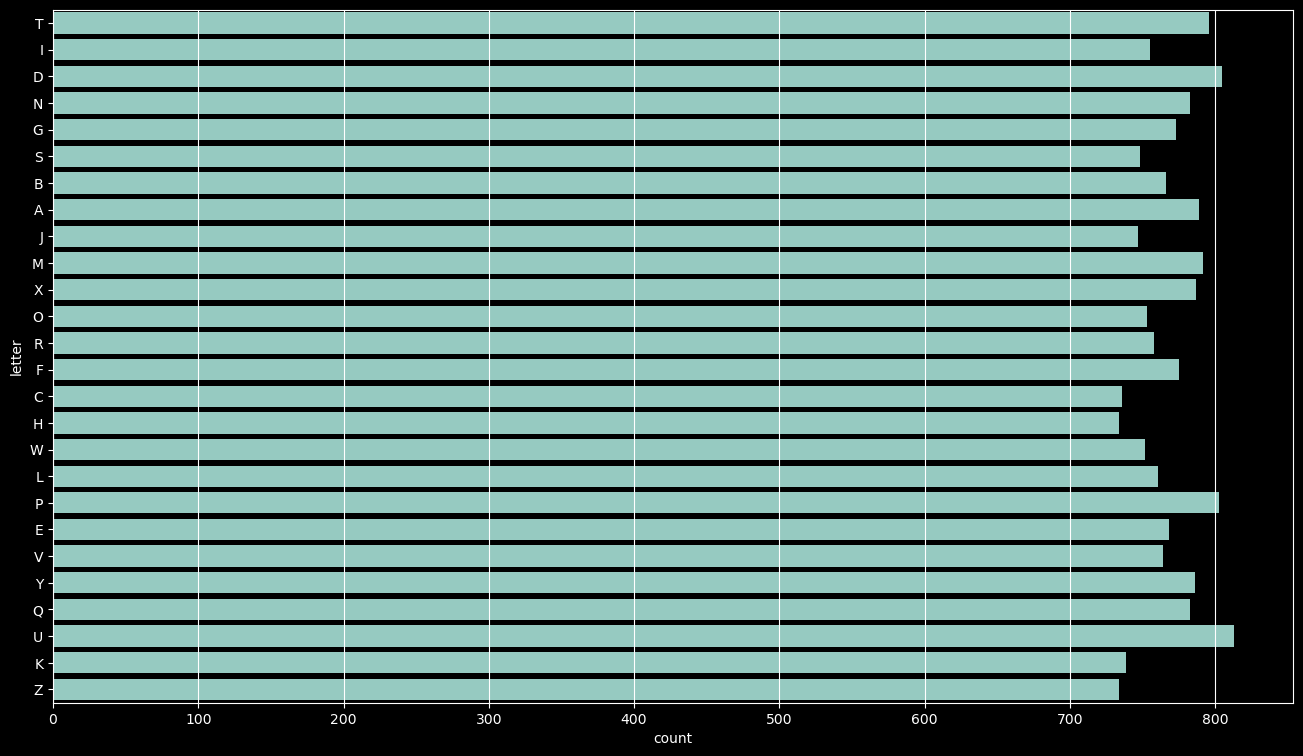

In [48]:
plt.figure(figsize=(16, 9))
plt.grid()
sns.countplot(y=y)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [51]:
model = RandomForestClassifier(n_estimators=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [62]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)   
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [68]:
new = X.iloc[345,:]
model.predict([new]), model.predict_proba([new])

(array(['Z'], dtype=object),
 array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.9]]))